In [1]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np
# img=np.random.normal(size=(16,16),scale=1)
# border = cv2.borderInterpolate(0, 1, cv2.BORDER_CONSTANT)
# sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5, borderType=border)
# sobely64f = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5, borderType=border)
# g=sobelx64f+sobely64f
# plt.imshow(sobely64f,cmap='binary')

In [2]:
# a=np.random.normal(size=(3,3),scale=4)

In [3]:
# import numpy as np
# import scipy.stats as st
# import skimage.transform

# def gkern(kernlen, nsig):
#     """Returns a 2D Gaussian kernel array."""

#     interval = (2*nsig+1.)/(kernlen)
#     x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
#     kern1d = np.diff(st.norm.cdf(x))
#     kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
#     kernel = kernel_raw/kernel_raw.sum()
#     return kernel

In [4]:
# kernel=gkern(21,7)
# border = cv2.borderInterpolate(0, 1, cv2.BORDER_CONSTANT)
# sobelx64f = cv2.Sobel(kernel,cv2.CV_64F,1,0,ksize=5, borderType=border)
# sobely64f = cv2.Sobel(kernel,cv2.CV_64F,0,1,ksize=5, borderType=border)
# # theta = np.radians(45)
# # c, s = np.cos(theta), np.sin(theta)
# # R = np.array(((c,-s), (s, c)))
# final=skimage.transform.rotate(sobelx64f,90)
# plt.imshow(final,cmap='binary')


In [5]:
# plt.imshow(sobelx64f,cmap='binary')

In [6]:
kernel

NameError: name 'kernel' is not defined

In [ ]:
# nsig=1
# kernlen=3
# interval = (2*nsig+1.)/(kernlen)
# x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen)
# kern1d = st.norm.pdf(x)
# kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
# kernel = kernel_raw/kernel_raw.sum()
# kernel.size

In [ ]:
# x

In [ ]:
# plt.imshow(kernel,cmap='binary')

In [ ]:
# np.diff(st.norm.cdf(x))

np.outer(kern1d, kern1d)

In [ ]:
# np.outer(kern1d, kern1d)

In [ ]:
# x1 = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen)
# st.norm.pdf(x1)

In [ ]:
# import numpy as np
# import scipy.stats as st
# import skimage.transform
# import cv2
# import matplotlib.pyplot as plt
# def gkern(kernlen, nsig):
#     """Returns a 2D Gaussian kernel array."""

#     interval = (2*nsig+1.)/(kernlen)
#     x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
#     kern1d = np.diff(st.norm.cdf(x))
#     kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
#     kernel = kernel_raw/kernel_raw.sum()
#     return kernel

In [ ]:
# def DoG(scales,orient,size):
#     scale=range(1,scales+1,2)
#     print(scale)
#     orients=np.linspace(0,360,orient)
#     kernels=[[0 for x in range(1,scales)]for y in range(1,orient)]
#     for each in scale:
#         kernel=gkern(size,each)
#         border = cv2.borderInterpolate(0, 1, cv2.BORDER_CONSTANT)
#         sobelx64f = cv2.Sobel(kernel,cv2.CV_64F,1,0,ksize=5, borderType=border)
#         for i,eachOrient in enumerate(orients):
#             plt.figure(figsize=(100,100))
#             image=skimage.transform.rotate(sobelx64f,eachOrient)
#             plt.subplots_adjust(hspace=0.1,wspace=1.5)
#             plt.subplot(scales,orient,i+1)
#             plt.imshow(image,cmap='binary')
#             plt.show()

In [ ]:
# DoG(6,90,4)

In [ ]:
# kernels=[[0 for x in range(0,8 for y in range(1,2)]
# kernels

In [ ]:
# for i,val in enumerate(orients):
#     print(i,val)

In [50]:
import numpy as np
import scipy.stats as st
import skimage.transform
import matplotlib.pyplot as plt
import cv2
import scipy
import sklearn

orients=np.linspace(0,360,4)
# kernels=[[0 for x in range(1,scales)]for y in range(1,4)]

kernel=gkern(4,7)
border = cv2.borderInterpolate(0, 1, cv2.BORDER_CONSTANT)
sobelx64f = cv2.Sobel(kernel,cv2.CV_64F,1,0,ksize=5, borderType=border)
DoG_stack = list()
scale = [3, 5]
size = [8]
for each_scale in scale:
    for each_size in size:
        for index,eachOrient in enumerate(orients):
            # plt.figure(figsize=(16,2))
            image=skimage.transform.rotate(sobelx64f,eachOrient)
            DoG_stack.append(image)
len(DoG_stack)

8

In [51]:
DoG_stack[0]

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [52]:
def gaussian1d(sigma, mean, x, ord):
    x = np.array(x)
    x_ = x - mean
    var = sigma**2

    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))

    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*((x_)/(var))
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g

def gaussian2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g

def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    h = g*((x*x + y*y) - var)/(var**2)
    return h

def makefilter(scale, phasex, phasey, pts, sup):

    gx = gaussian1d(3*scale, 0, pts[0,...], phasex)
    gy = gaussian1d(scale,   0, pts[1,...], phasey)

    image = gx*gy

    image = np.reshape(image,(sup,sup))
    return image

def makeLMfilters():
    sup     = 49
    scalex  = np.sqrt(2) * np.array([1,2,3])
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv
    F     = np.zeros([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)

    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = [[c+0,-s+0],[s+0,c+0]]
            rotpts = np.array(rotpts)
            rotpts = np.dot(rotpts,orgpts)
            F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
            F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1

    count = nbar+nedge
    scales = np.sqrt(2) * np.array([1,2,3,4])

    for i in range(len(scales)):
        F[:,:,count]   = gaussian2d(sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, 3*scales[i])
        count = count + 1

    return F




In [64]:
def gkern(kernlen, nsig):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel


def DoG(scales,orient,size):
#     scale=range(1,scales+1)
    # print(scale)
    orients=np.linspace(0,360,orient)
    # kernels=[[0 for x in range(1,scales)]for y in range(1,orient)]
    DoG_stack = list()
    for each_scale in scales:
        for each_size in size:
            kernel=gkern(each_size,each_scale)
            border = cv2.borderInterpolate(0, 1, cv2.BORDER_CONSTANT)
            sobelx64f = cv2.Sobel(kernel,cv2.CV_64F,1,0,ksize=5, borderType=border)
            for index,eachOrient in enumerate(orients):
                # plt.figure(figsize=(16,2))
                image=skimage.transform.rotate(sobelx64f,eachOrient)
                DoG_stack.append(image)

	            # plt.subplots_adjust(hspace=0.1,wspace=1.5)
	            # plt.subplot(scales,orient,index+1)
	            # plt.imshow(image,cmap='binary')
	            # plt.show()
    return DoG_stack


def gabor_filter_list(num_filters):
	gabor_filter = list()
	for each in range(1,num_filters):
		sigma = random.randint(3,6)
		theta = random.uniform(0,3.14)
		Lambda = random.randint(3,10)
		psi = random.randint(3,14)
		# gamma = random.randint(3,6)
		gamma = 1
		gabor_filter.append(gabor_fn(sigma,theta,Lambda,psi,gamma))
	return gabor_filter


def filter_bank():
    scale_list = [3,5,7,9]
    size_list = [7,11,15]
    orient = 16
    DoG_filters = DoG(scales=scale_list, orient = orient,size=size_list)
    LM_filters = makeLMfilters()
    gabor_filters = gabor_filter_list(10)
    return DoG_filters, LM_filters, gabor_filters



def texton_tensor(Img_gray):
    N_dim_tensor = Img_gray
#     N_dim_tensor_lm = Img_gray
#     N_dim_tensor_gabor = Img_gray
    
    DoG_filters, LM_filters, gabor_filters = filter_bank()
    
    for each in range(len(DoG_filters)):
        # kernel_op = cv2.filter2D(Img_gray,-1,filter_bank[:,:,each])
        kernel_op = cv2.filter2D(Img_gray,-1,DoG_filters[each])
        N_dim_tensor = np.dstack((N_dim_tensor,kernel_op))
    
    for each in range(len(LM_filters)):
        # kernel_op = cv2.filter2D(Img_gray,-1,filter_bank[:,:,each])
        kernel_op = cv2.filter2D(Img_gray,-1,LM_filters[each])
        N_dim_tensor = np.dstack((N_dim_tensor,kernel_op))
    
    
    for each in range(len(gabor_filters)):
        # kernel_op = cv2.filter2D(Img_gray,-1,filter_bank[:,:,each])
        kernel_op = cv2.filter2D(Img_gray,-1,gabor_filters[each])
        N_dim_tensor = np.dstack((N_dim_tensor,kernel_op))
    
    return N_dim_tensor


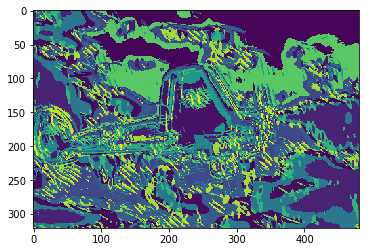

In [65]:
img = cv2.imread('/home/pratique/Downloads/cmsc733/Homework0/116353601_hw0/Phase1/BSDS500/Images/1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
N_dim_tensor_dog = texton_tensor(img_gray)
p,q,r = np.shape(N_dim_tensor_dog)
inp = np.reshape(N_dim_tensor_dog,((p*q),r))
kmeans = sklearn.cluster.KMeans(n_clusters = 64, random_state = 2)
kmeans.fit(inp)
labels = kmeans.predict(inp)
l = np.reshape(labels,(p,q))
plt.imshow(l)
plt.show()


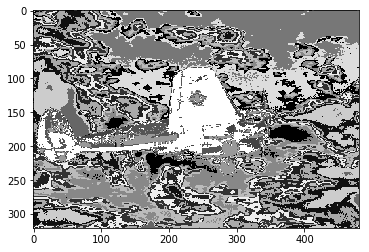

In [85]:
# brightness kmean
p,q= np.shape(img_gray)
inp = np.reshape(img_gray,((p*q),1))
kmeans = sklearn.cluster.KMeans(n_clusters = 16, random_state = 2)
kmeans.fit(inp)
labels = kmeans.predict(inp)
l = np.reshape(labels,(p,q))
plt.imshow(l,cmap = 'binary')
plt.show()


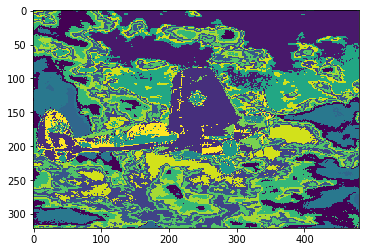

In [84]:
# img_lab = cv2.cvtColor(img, CV_BGR2Lab)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);
p,q,r = np.shape(img)
inp = np.reshape(img,((p*q),r))
kmeans = sklearn.cluster.KMeans(n_clusters = 16, random_state = 2)
kmeans.fit(inp)
labels = kmeans.predict(inp)
l = np.reshape(labels,(p,q))
plt.imshow(l)
plt.show()

In [180]:
def single_half_disk(radius):
    two_r_plus_1 = radius*2 + 1
    half_disk = np.ones([two_r_plus_1, two_r_plus_1])

    rs = np.power(radius,2)
    for i in range(radius):
        iss = np.power((i - radius),2)
        
        for j in range(two_r_plus_1):
            if (iss+ np.power((j - radius),2) < rs):
                half_disk[i, j] = 0
    return half_disk
    

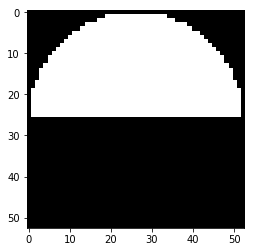

In [182]:
half_disk = single_half_disk(26)
plt.imshow(half_disk, cmap = 'binary')
plt.show()

In [197]:
def half_disk_bank(radius_list,orient):
    # scale=range(1,scales+1)
    # print(scale)
    orients=np.linspace(0,360,orient)
    # kernels=[[0 for x in range(1,scales)]for y in range(1,orient)]
    half_disk_bank_op = list()
    for each_rad in radius_list:
        one_half_disk=single_half_disk(each_rad)
        for eachOrient in orients:
            image=skimage.transform.rotate(one_half_disk,eachOrient)
            half_disk_bank_op.append(image)
    return half_disk_bank_op


In [198]:
radius_list = [7,20,35]
orient = 4
half_disk = half_disk_bank(radius_list,orient)
plt.imshow(half_disk, cmap = 'binary')
plt.show()

TypeError: 'dict' object is not callable

In [200]:
half_disk_bank_op = list()

TypeError: 'dict' object is not callable